In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf #deeplearning library

In [ ]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
data_train.shape, data_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
data=np.concatenate((data_train,data_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)
data.shape, label.shape

((70000, 28, 28), (70000,))

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(data,label,test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D #kernel
from keras.layers import Flatten
from keras.layers import MaxPooling2D #pooling

In [ ]:
Cnn=Sequential()
Cnn.add(Conv2D(3, input_shape=(28,28,1), kernel_size=(3,3),padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200,activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100,activation="relu"))
Cnn.add(Dense(10,activation="softmax")) #0~9
Cnn.compile(loss="sparse_categorical_crossentropy",metrics="accuracy",optimizer="adam")

In [ ]:
Cnn.fit(train_input,train_output,epochs=5, batch_size=100)

Epoch 1/5
560/560 [==============================] - 20s 35ms/step - loss: 3.0707 - accuracy: 0.8177
Epoch 2/5
560/560 [==============================] - 15s 27ms/step - loss: 0.4344 - accuracy: 0.8951
Epoch 3/5
560/560 [==============================] - 15s 27ms/step - loss: 0.3014 - accuracy: 0.9216
Epoch 4/5
560/560 [==============================] - 15s 27ms/step - loss: 0.2371 - accuracy: 0.9354
Epoch 5/5
560/560 [==============================] - 15s 27ms/step - loss: 0.1947 - accuracy: 0.9459


In [ ]:
Cnn.evaluate(test_input,test_output)

438/438 [==============================] - 3s 7ms/step - loss: 0.1679 - accuracy: 0.9555


[0.1679203063249588, 0.9555000066757202]

In [ ]:
import cv2

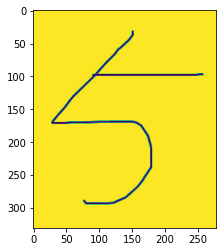

In [ ]:
test=cv2.imread("/content/number_5.JPG",cv2.IMREAD_GRAYSCALE)
plt.imshow(test)

In [ ]:
test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
test_BW=255-test

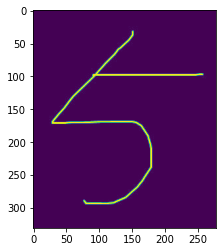

In [ ]:
plt.imshow(test_BW)

In [ ]:
test_BW.shape

(331, 278)

In [ ]:
test_BW_size=cv2.resize(test_BW,(28,28))
test_BW_size.shape

(28, 28)

In [ ]:
Cnn.predict(test_BW_size)

ValueError: ignored

In [ ]:
test_BW_size_re=test_BW_size.reshape(1,28,28)
test_BW_size_re.shape

(1, 28, 28)

In [ ]:
Cnn.predict(test_BW_size_re)

array([[6.8012135e-08, 3.2187334e-05, 3.6726590e-06, 1.2289265e-02,
        1.8340327e-01, 4.6364620e-01, 1.7873344e-05, 1.1053203e-01,
        6.0669743e-05, 2.3001476e-01]], dtype=float32)

In [ ]:
np.argmax(Cnn.predict(test_BW_size_re))

5